In [12]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from Functions import accuracy, predict_outcome

In [13]:
# load dataset
dataset = pd.read_csv('FALL_without_raw.csv')
# print the first 5 rows to confirm the dataset
dataset.head(5)

In [15]:
#split dataset in features and target variable
X = dataset.drop('IVD', axis=1) # Features
Y = dataset.IVD # Target variable

# count the number of 1s(crashes) and 0s in the IVD column of the CSV
value_count = dataset.IVD.value_counts()

Text(0.5, 1.0, 'Feature correlation')

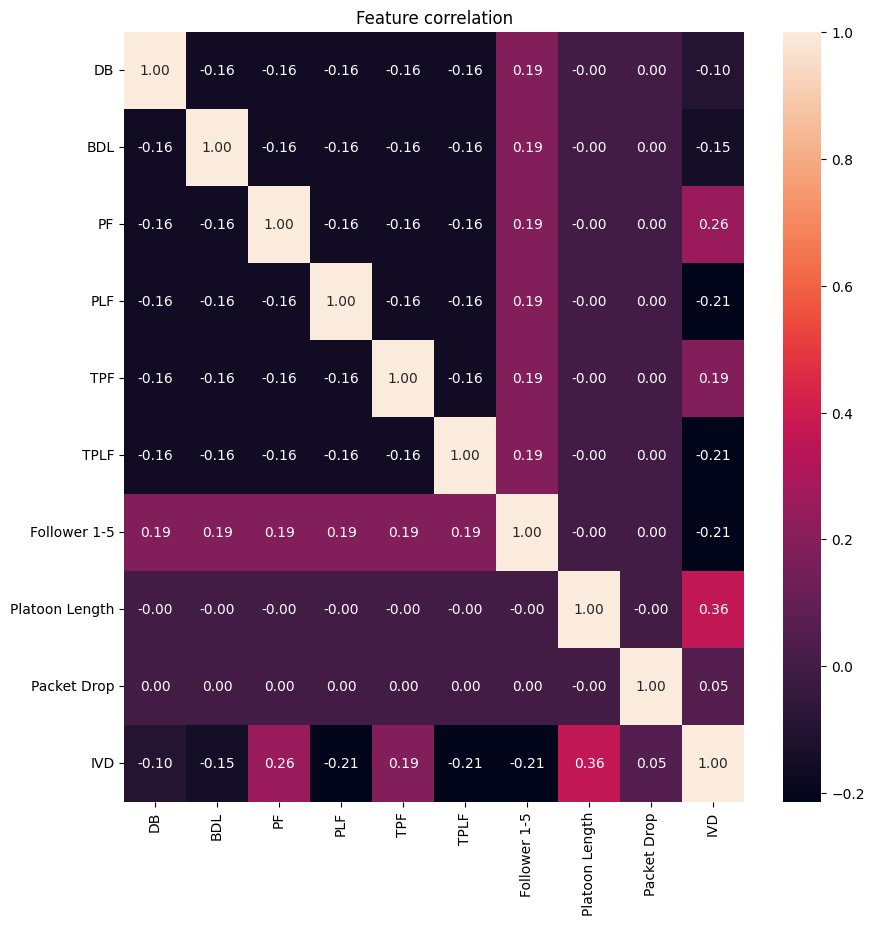

In [16]:
# plot a heatmap
# set the size
plt.figure(figsize=(10,10))
# plot seaborn heatmap to show correlations in the dataset from 1 to -1, with a floating point number with 2 decimal places.
corr_plot = sns.heatmap(dataset.corr(), annot=True, fmt = "0.2f")
# print the title
plt.title("Feature correlation")

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


In [18]:
# define a grid of parameters for the decision tree classifier
param_grid = {'criterion' : ['gini', 'entropy'], # measure the quality of the split
              'max_depth' : [None, 5, 10, 20, 30, 40, 50, 100], # maximum depth of the tree to avoid overfitting
              'min_samples_split': [2, 5, 10, 20, 50, 100], # minimum number of samples required to split a node
              'min_samples_leaf': [1, 2, 3, 10, 20]} # min samples required in a leaf

# search the grid for the best parameters for the dataset
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# print to show the best parameters
print(f'{best_params}')

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [19]:
# Create Decision Tree classifier object with found best parameters
tree_model = DecisionTreeClassifier(**best_params)
# train the DTC with the training data
tree_model = tree_model.fit(X_train, y_train)
# make predictions using the test data
y_pred = tree_model.predict(X_test)
# print accuracy metrics
accuracy(y_test,y_pred, value_count)

Number of positives and negatives: 
 IVD
0    1024
1     296
Name: count, dtype: int64
Confusion Matrix: 
 [[303  12]
 [  6  75]]
Accuracy: 0.9545454545454546 
Precision: 0.8620689655172413 
Recall: 0.9259259259259259 
F1 Score: 0.8928571428571429


In [20]:
# create support vector classifier model
svc_model = SVC()
svc_model = svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)

accuracy(y_test,y_pred, value_count)

Number of positives and negatives: 
 IVD
0    1024
1     296
Name: count, dtype: int64
Confusion Matrix: 
 [[312   3]
 [ 28  53]]
Accuracy: 0.9217171717171717 
Precision: 0.9464285714285714 
Recall: 0.654320987654321 
F1 Score: 0.7737226277372263


In [21]:
# create logistic regression model 
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

accuracy(y_test,y_pred, value_count)

Number of positives and negatives: 
 IVD
0    1024
1     296
Name: count, dtype: int64
Confusion Matrix: 
 [[295  20]
 [ 19  62]]
Accuracy: 0.9015151515151515 
Precision: 0.7560975609756098 
Recall: 0.7654320987654321 
F1 Score: 0.7607361963190185


In [22]:
# allow user to input data to make predictions using the trained decision tree classifier. 
print(f'Prediction: {predict_outcome(dataset, tree_model)}')

Enter prediction variables:
Prediction: No crash
